In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# qiskit-ibmq-provider has been deprecated.
# Please see the Migration Guides in https://ibm.biz/provider_migration_guide for more detail.
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session, Options

# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")

# Invoke a primitive. For more details see https://qiskit.org/documentation/partners/qiskit_ibm_runtime/tutorials.html
# result = Sampler("ibmq_qasm_simulator").run(circuits).result()

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import Aer, execute

#|a> = 0001
#|b> = 0011

qr = QuantumRegister(13, 'q') #Creating a quantum register with 13 qubits and naming each as 'qn' ('n' is the serial number of the qubit).
cr = ClassicalRegister(5, 'c')#Creating a classical register with 5 bits for reading the measurement value at the end.
circ = QuantumCircuit(qr, cr)

#Setting up the circuit for perfoming 4-bit addition.

#Feeding up the input of qubits |a> = 0010 & |b> = 1011 using Pauli-X gate on appropriate qubits.

#For the input |a> = 0001
circ.x(1) #Qubit |a(0)> initialised to state "1" using Pauli-X gate.

#For the input |b> = 0011
circ.x(2) #Qubit |b(0)> initialised to state "1" using Pauli-X gate.
circ.x(5) #Qubit |b(1)> initialised to state "1" using Pauli-X gate.


#Gate operations of first Full-Adder circuit box.

circ.ccx(1, 2, 3) #Toffoli gate with 'q1' & 'q2' as control qubits and 'q3' as target qubit.
circ.cx(1, 2) #Controlled-NOT gate with 'q1' as control qubit and 'q2' as target qubit.
circ.ccx(0, 2, 3) #Toffoli gate with 'q1' & 'q2' as control qubits and 'q3' as target qubit.
circ.cx(0, 2) #Controlled-NOT gate with 'q0' as control qubit and 'q2' as target qubit.

circ.measure(2, 0) #Measuring 'q2' Qubit. The result of (|a0> + |b0>) is produced in 'q2' whose sum will be counted as 1st bit in the resultant bit (|s0>).

circ.barrier(0, 1, 2, 3, 4) #A circuit barrier is added to create a neat looking and easily comprehensible circuit diagram.


#Gate opertions of second Full-Adder circuit box.

circ.ccx(4, 5, 6) #Toffoli gate with 'q4' & 'q5' as control qubits and 'q6' as target qubit.
circ.cx(4, 5) #Controlled-NOT gate with 'q4' as control qubit and 'q5' as target qubit.
circ.ccx(3, 5, 6) #Toffoli gate with 'q3' & 'q5' as control qubits and 'q6' as target qubit.
circ.cx(3, 5) #Controlled-NOT gate with 'q3' as control qubit and 'q5' as target qubit.

circ.measure(5, 1) #Measuring 'q5' Qubit. The result of (|a1> + |b1>) is produced in 'q5' whose sum will be counted as 2nd bit in the resultant bit (|s1>).

circ.barrier(3, 4, 5, 6, 7) #A circuit barrier is added to create a neat looking and easily comprehensible circuit diagram.


#Gate opertions of third Full-Adder circuit box.

circ.ccx(7, 8, 9) #Toffoli gate with 'q7' & 'q8' as control qubits and 'q9' as target qubit.
circ.cx(7, 8) #Controlled-NOT gate with 'q7' as control qubit and 'q8' as target qubit.
circ.ccx(6, 8, 9) #Toffoli gate with 'q6' & 'q8' as control qubits and 'q9' as target qubit.
circ.cx(6, 8) #Controlled-NOT gate with 'q6' as control qubit and 'q8' as target qubit.

circ.measure(8, 2) #Measuring 'q8' Qubit. The result of (|a2> + |b2>) is produced in 'q8' whose sum will be counted as 3rd bit in the resultant bit (|s2>).

circ.barrier(6, 7, 8, 9, 10) #A circuit barrier is added to create a neat looking and easily comprehensible circuit diagram.


#Gate opertions of fourth Full-Adder circuit box.

circ.ccx(10, 11, 12) #Toffoli gate with 'q10' & 'q11' as control qubits and 'q12' as target qubit.
circ.cx(10, 11) #Controlled-NOT gate with 'q10' as control qubit and 'q11' as target qubit.
circ.ccx(9, 11, 12) #Toffoli gate with 'q9' & 'q11' as control qubits and 'q12' as target qubit.
circ.cx(9, 11) #Controlled-NOT gate with 'q9' as control qubit and 'q11' as target qubit.

circ.measure(11, 3) #Measuring 'q11' Qubit. The result of (|a3> + |b3>) is produced in 'q11' whose sum will be counted as 4th bit in the resultant bit (|s3>).
circ.measure(12, 4) #Measuring 'q12' Qubit. The result of (|a3> + |b3>) is produced in 'q12' whose sum will be counted as 1st carry bit in the resultant bit (|c>).


#The 5-bit result is displayed after 1024 shots are executed.
counts = execute(circ, Aer.get_backend('qasm_simulator')).result().get_counts()
print(counts) #|a> + |b> = |00100> is the result of the above 4-bit addition.

{'00100': 1024}


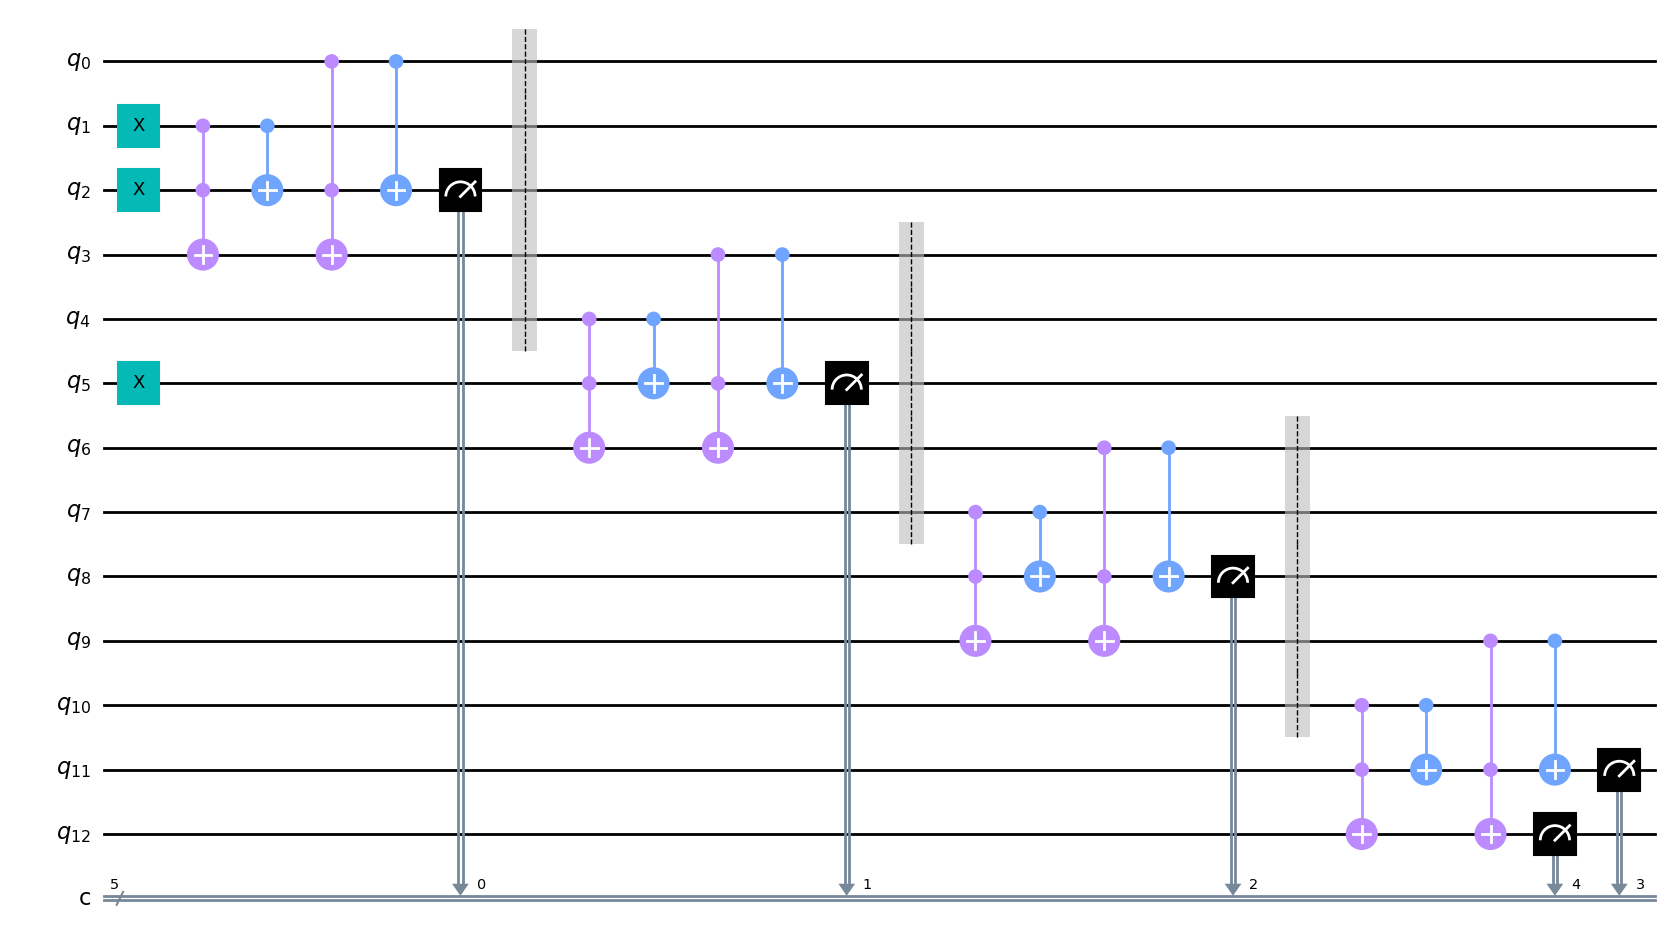

In [6]:
circ.draw('mpl') #Draws circuit diagram.

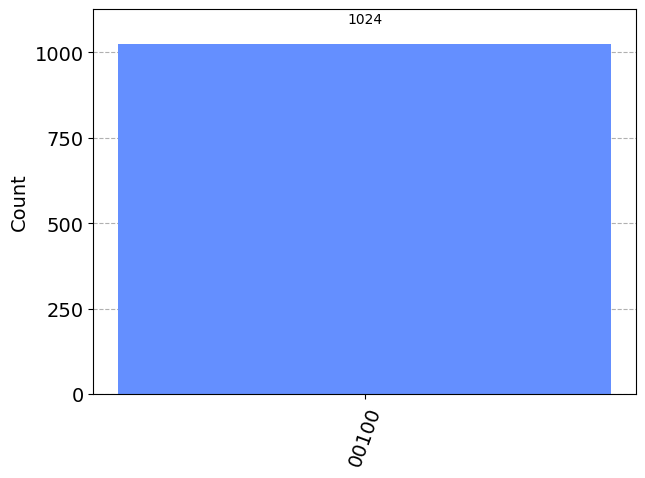

In [7]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

#Plotting the Histogram.